**<font color = black size=6>实验三:逻辑回归</font>**

**<font color = blue size=4>第一部分:数据预处理介绍</font>**

<span style="color:purple">机器学习所使用的数据集并不一定能够直接进行使用，如可能出现缺失值或者异常值（如异常0或者异常大的数据），又或者是数据类型不适合直接应用于模型训练等。因此，数据预处理是机器学习过程中十分重要的一个部分。<br>本次实验包括数据预处理，包括判断数据是否有缺失值以及异常值、缺失值替换操作、并将部分特征值类型转换为适合模型训练的类型。在进行逻辑回归实验之前，首先介绍下上述操作所用到的python语法。</span>

<span style="color:purple">1) 判断一列中是否有缺失值</span>

In [1]:
# 载入需要使用的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [64]:
#通过pandas将csv文件转换为dataframe格式后进行操作
train1_frame = pd.read_csv('introduction.csv')
#该数据描述了不同性别的人的身高和体重数据
#包括身高、体重、性别三个属性
print(train1_frame)
#打印出数据，观察数据异常值情况 


   height  weight     sex
0   170.0    54.0    Male
1   180.0     NaN    Male
2   164.0    48.0  Female
3     NaN    66.0    Male
4   176.0     NaN  Female
5   162.0    59.0    Male
6   154.0    46.0    Male
7   155.0    58.0  Female
8   165.0     0.0  Female
9     NaN    50.0  Female


In [81]:
# 可发现数据异常值包括0和空值(即NaN)
# 第3、9行的身高为空值，第1、4行的体重为空值，第8行的体重为0

# 使用pandas.dataframe的isnull()函数判断数据是否有空值NaN
# 作用：检查表格里的每个格子是不是“空值”（缺失值，通常显示为 NaN）。
# 用法：dataframe.isnull() 
# 返回结果：得到一个和原表格一样大小的新表格，里面每个格子都是 True 或 False。
#   True 表示这个位置是空值（缺失了数据）
#   False 表示这个位置有数据
print("==================判断数据是否有空值=====================")
print(train1_frame.isnull())
# 可以看到第3、9行的身高列为True，第1、4行的体重列为True，说明这些位置是空值


# 使用pandas.dataframe的sum()函数对布尔值进行求和，判断每一列是否有空值并返回每列空值的数量
# 作用：对表格里的每一列进行“求和”。
# 用法：dataframe.sum()
# 如果用在 isnull() 的结果上，就是统计每一列有多少个空值。
print("==================统计每列空值的数量=====================")
print(train1_frame.isnull().sum())
# 可以看到身高列有2个空值，体重列有2个空值，性别列没有空值

==================判断数据是否有空值=====================
   height  weight    sex
0   False   False  False
1   False    True  False
2   False   False  False
3    True   False  False
4   False    True  False
5   False   False  False
6   False   False  False
7   False   False  False
8   False   False  False
9    True   False  False
==================统计每列空值的数量=====================
height    2
weight    2
sex       0
dtype: int64


<span style="color:purple">2) 对每一列的缺失值和异常值进行替换操作</span>

In [4]:
# 先将0替换为空值，下一步再对统一对空值进行处理

# 利用pandas中的replace函数将某一列的指定值替换为另一个值
# replace 是 pandas 里用来“批量替换”表格数据的工具。你可以把表格里的某些值（比如 0、空字符串等）一次性换成你想要的新值（比如 NaN、平均值等）。
# 基本用法如下：dataframe.replace(旧值, 新值)
#   dataframe：你的表格对象
#   旧值：你想要替换掉的内容
#   新值：你想要换成的内容

# replace函数可以同时替换多列
# 下面的语句把 'height' 和 'weight' 两列中的所有 0 替换成空值（np.NaN）
# 这样做是因为 0 在身高和体重数据里通常是不合理的异常值，后续可以统一处理这些空值
train1_frame[['height', 'weight']]=train1_frame[['height', 'weight']].replace(0, np.nan)
print(train1_frame)

   height  weight     sex
0   170.0    54.0    Male
1   180.0     NaN    Male
2   164.0    48.0  Female
3     NaN    66.0    Male
4   176.0     NaN  Female
5   162.0    59.0    Male
6   154.0    46.0    Male
7   155.0    58.0  Female
8   165.0     NaN  Female
9     NaN    50.0  Female


In [7]:
# 替换数据中的空值为平均值
# 我们希望将男性的身高、体重中的空值替换为男性的平均值
# 将女性的身高、体重中的空值替换为女性的平均值

# 首先，将数据按照性别分组
# groupby()函数用于将数据按照某一列或多列进行分组，然后对每组目标分别进行统计、计算均值等操作
# 用法：dataframe.groupby('分组列')['目标列']
# 返回结果：返回一个分组对象，可以对每个分组进行操作
print("==================按性别分组=====================")
height_group_by_gender = train1_frame.groupby('sex')['height']
weight_group_by_gender = train1_frame.groupby('sex')['weight']
print(type(height_group_by_gender))

# 可以使用.mean()函数计算每组的平均值
# 虽然下面并没有用到，但是作为示例，示范grouby对象的用法
print(height_group_by_gender.mean())
print(weight_group_by_gender.mean())


# 随后，按性别分类并计算每组的平均身高和平均体重，并生成一个与原数据行数相同的序列，
# 并把所有“男”的行都填上“男”的平均身高/体重，所有“女”的行都填上“女”的平均身高/体重。
# 这样可以方便地用来替换原数据中的空值
# transform()函数可以对分组对象进行转换操作，返回一个与原数据行数相同的序列
# 这里我们使用'transform('mean')'来计算每组的平均值，并将男性的身高体重均值填充到所有男性的行，女性的身高体重均值填充到所有女性的行
# 这样做的好处是，后面可以直接用 fillna 把缺失的身高/体重用本组的均值补上，非常方便。
mean_height_by_gender = height_group_by_gender.transform('mean')
mean_weight_by_gender = weight_group_by_gender.transform('mean')
# 可以打印出来看看
print("==================按性别分组计算每组的平均值，并生成一个与原数据行数相同的序列=====================")
print(mean_height_by_gender)
print(mean_weight_by_gender)

# 使用每个性别组的平均值来替换缺失值
# fillna()函数用于填充空值NaN
# 用法：dataframe['列名'].fillna(填充值, inplace=True)
# fillna()函数常见的用法是使用填充值填补该列的所有空值，例如，dataframe['列名'].fillna(1)就会将该列的所有空值替换为1
# 参数inplace=True表示直接在原数据上进行修改，而不是返回一个新的数据
# 然而，我们希望根据性别组的平均值来替换空值
# 因此，我们可以将前面生成的与原数据行数相同的平均值序列传递给fillna()函数。
# 如果传一个和原表一样长的序列，fillna 会按行匹配，每行缺失就用该行对应的值。
# 这样 fillna 才能“对号入座”，每个缺失值都能用对应的均值补上。
# 下面的语句将身高和体重列中的空值替换为对应性别组的平均值
print("==================使用每个性别组的平均值来替换缺失值=====================")
train1_frame['height'].fillna(mean_height_by_gender, inplace=True)
train1_frame['weight'].fillna(mean_weight_by_gender, inplace=True)
# 打印结果
print(train1_frame)

==================按性别分组=====================
<class 'pandas.core.groupby.generic.SeriesGroupBy'>
sex
Female    165.0
Male      166.5
Name: height, dtype: float64
sex
Female    52.00
Male      56.25
Name: weight, dtype: float64
==================按性别分组计算每组的平均值，并生成一个与原数据行数相同的序列=====================
0    166.5
1    166.5
2    165.0
3    166.5
4    165.0
5    166.5
6    166.5
7    165.0
8    165.0
9    165.0
Name: height, dtype: float64
0    56.25
1    56.25
2    52.00
3    56.25
4    52.00
5    56.25
6    56.25
7    52.00
8    52.00
9    52.00
Name: weight, dtype: float64
==================使用每个性别组的平均值来替换缺失值=====================
   height  weight     sex
0   170.0   54.00    Male
1   180.0   56.25    Male
2   164.0   48.00  Female
3   166.5   66.00    Male
4   176.0   52.00  Female
5   162.0   59.00    Male
6   154.0   46.00    Male
7   155.0   58.00  Female
8   165.0   52.00  Female
9   165.0   50.00  Female


<span style="color:purple">3) 将标记值从字符串变成容易操作的整数类型</span>

In [6]:
# 最后，将性别列中的字符串值转换为数值型
# 机器学习模型只能处理数字，不能直接处理字符串。把性别变成0/1后，模型就能用它来做计算和分类了。
# 这里我们将'Male'替换为0，将'Female'替换为1
# np.where()函数用于根据条件选择值
# 用法：np.where(条件, 满足条件时的值, 不满足条件时的值)
# 该函数会检查每个元素是否满足条件，如果满足则返回满足条件时的值，否则返回不满足条件时的值
# 这里我们检查性别列中的值是否为'Male'，如果是则返回0，否则返回1
# 下面的语句将性别列中的'Male'替换为0，将'Female'替换为1    
train1_frame['sex'] = np.where(train1_frame['sex'] == "Male", 0, 1)
print(train1_frame)

   height  weight  sex
0   170.0   54.00    0
1   180.0   56.25    0
2   164.0   48.00    1
3   166.5   66.00    0
4   176.0   52.00    1
5   162.0   59.00    0
6   154.0   46.00    0
7   155.0   58.00    1
8   165.0   52.00    1
9   165.0   50.00    1


<span style="color:purple">4) 绘制散点图：在二维平面上可视化数据集的样本点</span>

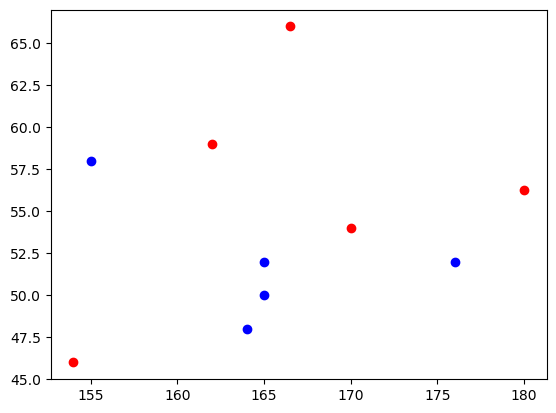

In [7]:
# 绘制散点图，观察数据分布情况
# 我们先使用class_1和class_0分别存储性别为1（女性）和0（男性）的样本
# 然后分别绘制两类样本的散点图
class_1=train1_frame[train1_frame['sex']==1]
class_0=train1_frame[train1_frame['sex']==0]

# 可使用plt.scatter来绘制出数据集的每个样本点，并设置指定颜色来区分不同性别的样本
# 用法：plt.scatter(x,y,c="color")，x、y为坐标值，c为指定颜色
# 这里以身高为x轴，体重为y轴，绘制每个样本散点图
# 男性样本用红色表示，女性样本用蓝色表示
plt.scatter(class_1['height'],class_1['weight'],c='blue')
plt.scatter(class_0['height'],class_0['weight'],c='red')
plt.show()

<span style="color:purple">5) 可视化分类决策边界：在二维平面上绘制一条直线，并给直线两侧着色

作为示例，我们在二维平面上绘制一条简单的直线$x_1-2x_2+0=0$，并给$x_1-2x_2+0\le 0$的部分着红色，给$x_1-2x_2+0\ge 0$的部分着蓝色
</span>

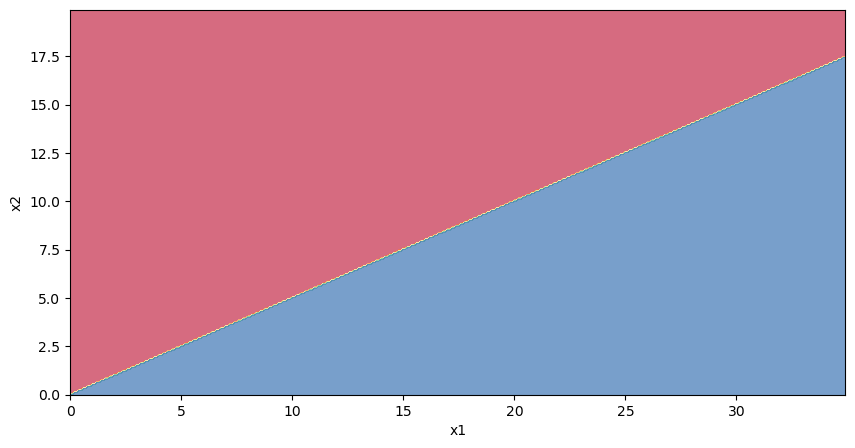

In [16]:
# 这里，我们给出了一段绘制二维直线及着色的代码
# 该代码可以绘制出逻辑回归的决策边界，以及决策边界两侧的分类区域
# 在后续的逻辑回归实验中，我们会用到这段代码来可视化决策边界
# 在定义了关键参数w, x1_range, x2_range后，可以复制粘贴并直接使用
# 如果对函数的实现细节感兴趣，可以参考下一个代码块的解释来理解函数的实现

'''
使用这段代码时，需要定义以下参数：
w: 权重参数，形状为(3,1)或(3,)
x1_range: x轴范围 (min, max)
x2_range: y轴范围 (min, max)
'''
# 权重参数w=[b,w1,w2]，其中b为偏置项，w1、w2为x1、x2的权重
# 在二维平面上绘制出的直线为w1*x1 + w2*x2 + b = 0，直线一侧的区域分类为0，另一侧的区域分类为1
# 例如，w = [[0],[1],[-2]]表示直线x2 = 0.5*x1，直线左侧区域分类为0，右侧区域分类为1

# 设置x轴和y轴的范围 
# x1_range和x2_range分别表示x轴和y轴的取值范围，分别是两个二元组
# 在实际使用的时候，可以定义为数据集样本x1和x2的范围

# 下面定义关键参数：
w = np.array([[0],[1],[-2]])
x1_range=(0,35)
x2_range=(0,20)

# 下面是可以复制粘贴并直接使用的代码
x1_min, x1_max = x1_range
x2_min, x2_max = x2_range
plt.figure(figsize=(10,5))
step=0.1
boundary_x1, boundary_x2 = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
grid = np.c_[boundary_x1.ravel(), boundary_x2.ravel()]
e = np.ones((len(grid), 1))
grid = np.c_[e, grid]
z = grid.dot(w.reshape(-1,1))
# 逻辑回归sigmoid并分类
for i in range(len(z)):
    z[i][0] = 1 / (1 + np.exp(-z[i][0]))
    z[i][0] = 0 if z[i][0] < 0.5 else 1
z = z.reshape(boundary_x1.shape)
plt.contourf(boundary_x1, boundary_x2, z, alpha=0.7, cmap=plt.cm.Spectral, zorder=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


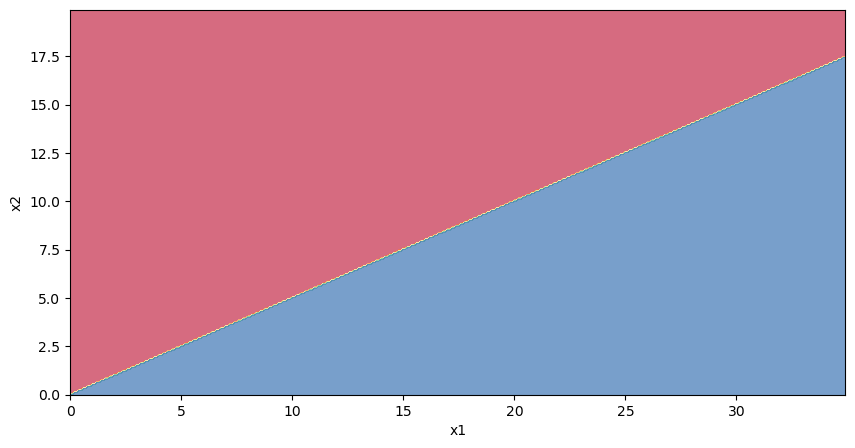

In [9]:
'''
下面的代码是上面函数的展开解释
如果有兴趣，可以对比上面的函数和下面的代码，理解每一步的作用
'''
#确定图画边界和大小，图画的大小不需要和横纵坐标的范围相同
plt.figure(figsize=(10,5))
#横坐标：0-35，纵坐标：0-20
x1_min, x1_max = 0,35
x2_min, x2_max = 0,20

# 使用numpy中的meshgrid生成网格矩阵，方便进行之后的描点
# 1. np.arange(x1_min, x1_max, 0.01)：生成x1方向的坐标数组（间隔0.01），生成x2方向的坐标数组同理
#    → 例如x1_min=0, x1_max=1时，会生成[0.0, 0.01, 0.02,...,0.99]
# 2. np.meshgrid()：将两个一维坐标数组组合成二维网格矩阵
#    → 生成两个相同大小的矩阵：
#      - boundary_x1：每一行存储相同的 x1 坐标值，对应 x1 轴的网格坐标，例如[[x1_0,x1_1],[x1_0,x1_1]]
#      - boundary_x2：每一列存储相同的 x2 坐标值，对应 x2 轴的网格坐标，例如[[x2_0,x2_0],[x2_1,x2_1]]

# 第二行代码将二维网格转换为一维坐标点列表，整理成适合计算的格式
# 1. .ravel()：将二维矩阵展开成一维数组
#    → boundary_x1从"棋盘格"形状变成"一行行连接"的形状
# 2. np.c_[]：水平拼接两个一维数组
#    → 最终得到N×2的数组，每行包含一个完整的坐标点 [x1, x2]
# 示意图：
# 原始网格（2x2）：
# [[x1_0,x1_1],[x1_0,x1_1]]   → 展开后 → [x1_0,x1_1,x1_0,x1_1]
# [[x2_0,x2_0],[x2_1,x2_1]]   → 展开后 → [x2_0,x2_0,x2_1,x2_1]
# 拼接后：
# [[x1_0,x2_0], [x1_1,x2_0], [x1_0,x2_1], [x1_1,x2_1]]
boundary_x1, boundary_x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.1),np.arange(x2_min, x2_max, 0.1))
grid = np.c_[boundary_x1.ravel(), boundary_x2.ravel()]

# 加入偏置(或w_0)对应的特征为1的一列
# 1. 创建一个形状为 (grid.shape[0], 1) 的全 1 矩阵 e，表示偏置项
#    → 例如 grid=[[x1_0,x2_0], [x1_1,x2_0], [x1_0,x2_1], [x1_1,x2_1]], 形状为 (4,2)（即包含 4 个点，每个点有 2 个特征 x 和 y），
#      那么 e 形状为 (4,1)：[[1], [1], [1], [1]]
# 2. 使用 np.c_[] 将 e 与 grid 按列拼接，形成一个新的特征矩阵
#    → 原 grid 形状 (4,2)：[[x1_0,x2_0], [x1_1,x2_0], [x1_0,x2_1], [x1_1,x2_1]]
#    → 拼接后 grid 形状 (4,3)：[[1,x1_0,x2_0], [1,x1_1,x2_0], [1,x1_0,x2_1], [1,x1_1,x2_1]]
e=np.ones((len(grid),1))
grid=np.c_[e,grid]

# 假定下列的模型参数 [[w0],[w1],[w2]]=[[0],[1],[-2]]
# grid 是 (N, 3) 形状的矩阵，每行是一个坐标点 (1, x1, x2)
# w 是逻辑回归的权重参数 (3, 1)
# 通过矩阵乘法 grid.dot(w) 计算每个网格点的线性变换结果，即 z = w_0 + w_1 * x1 + w_2 * x2
w=np.array([[0],[1],[-2]])
z=grid.dot(w)

# 计算网格点中每个点的逻辑回归预测值
# 对每个 z 值应用 sigmoid 函数，并转换为 0 或 1（二分类）
for i in range(len(z)):
    # 1. 计算 sigmoid 函数：σ(z) = 1 / (1 + exp(-z))
    z[i][0]=(1/(1+np.exp(-z[i][0])))

    # 2. 设定分类阈值：
    #    - 如果 sigmoid 结果 < 0.5，则分类为 0
    #    - 如果 sigmoid 结果 ≥ 0.5，则分类为 1
    if(z[i][0]<0.5):z[i][0]=0
    else:z[i][0]=1

# 绘制决策边界
# 1. 由于 contourf() 需要与 boundary_x, boundary_y 形状匹配，
#    这里将 z 重新调整形状，使其与网格的形状相同
# 2. plt.contourf() 用于绘制等高线填充图，根据 z 的分类值填充不同颜色
#    cmap=plt.cm.Spectral 设置颜色映射，使得不同类别的区域颜色不同
#    zorder=1 确保边界的图层不会被其他图形遮挡
z=z.reshape(boundary_x1.shape)
plt.contourf(boundary_x1, boundary_x2, z, alpha=0.7, cmap=plt.cm.Spectral, zorder=1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

<span style="color:purple">6) 将样本点散点图和决策边界绘制在一起，可视化分类的效果
</span>

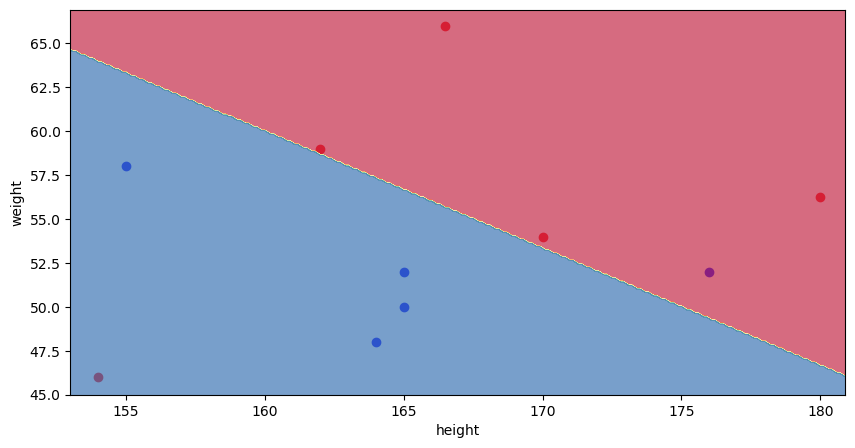

In [10]:
# 这里我们使用上面的代码，结合我们自己的数据，来绘制出逻辑回归的决策边界
# 这里我们假设逻辑回归的权重参数w=[500,-2,-3]
# 该参数表示的直线方程为-2*x1 - 3*x2 + 500 = 0
# 直线一侧的区域分类为0，另一侧的区域分类为1
# 我们将使用该参数来绘制决策边界
# 这里我们将x1、x2的范围设置为数据集样本的范围
x1_min, x1_max = train1_frame.iloc[:, 0].min() - 1, train1_frame.iloc[:, 0].max() + 1
x2_min, x2_max = train1_frame.iloc[:, 1].min() - 1, train1_frame.iloc[:, 1].max() + 1
w=np.array([[500],[-2],[-3]])

# 下面我们复制粘贴上面的代码，只有一处需要改动
plt.figure(figsize=(10,5))
# 绘制数据集的散点图，将样本散点图和决策边界绘制在一张图上
plt.scatter(class_1['height'],class_1['weight'],c='blue')
plt.scatter(class_0['height'],class_0['weight'],c='red')

# 下面完全使用上面的代码
step=0.1
boundary_x1, boundary_x2 = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
grid = np.c_[boundary_x1.ravel(), boundary_x2.ravel()]
e = np.ones((len(grid), 1))
grid = np.c_[e, grid]
z = grid.dot(w.reshape(-1,1))
# 逻辑回归sigmoid并分类
for i in range(len(z)):
    z[i][0] = 1 / (1 + np.exp(-z[i][0]))
    z[i][0] = 0 if z[i][0] < 0.5 else 1
z = z.reshape(boundary_x1.shape)
plt.contourf(boundary_x1, boundary_x2, z, alpha=0.7, cmap=plt.cm.Spectral, zorder=1)
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

**<font color = blue size=4>第二部分:逻辑回归</font>**

<span style="color:purple">Iris数据集（鸢尾花卉数据集）是常用的分类实验数据集,是一类多重变量分析的数据集。我们实验选取数据集的部分内容，包含训练集80个数据样本和测试20个样本。每个数据有2个属性：花萼长度($x_1$)，花萼宽度($x_2$)。通过这2个属性预测鸢尾花卉属于（Setosa，Versicolour）二个种类中的哪一类。</span>

<span style="color:purple">1) 导入数据集，进行数据预处理

使用pandas库将训练数据集'flower_train.csv'与测试数据集'flower_test.csv'载入到Dataframe对象中。判断训练集中每列数据是否有缺失值或者不合理的数值，如果有，请进行数据预处理。测试集为完好的数据集，不需要进行预处理。由于花卉类型(type)为字符串类型，请将训练集和测试集中花卉类型转换为适合模型训练的类型</span>

In [11]:
#your code here------

# Tips: 这一部分就是第一部分所介绍的数据预处理部分
# 1.读取数据集，载入到Dataframe对象中
# 2.判断数据中的缺失值和异常值，并进行处理
# 3.将花卉类型(type)由字符串类型转换为int类型
# 4.用np.array()将dataframe格式转换为numpy数组
# 4.将训练集和测试集的特征和标签分别划分为特征数组和标签数组(可以使用数组切片操作，或自行实现)

<span style="color:purple"> 2) 在数据集中添加对应偏置项的特征为1的一列

线性回归模型为$z=\omega^T x=\omega_0+\omega_1x_1+\omega_2x_2+...+\omega_dx_d$。在这里，额外引入$x_0=1$这一特征。请相应地往测试集和训练集添加$x_0=1$这一特征。</span>

In [12]:
#your code here------

# Tips: 在上一步划分好的训练集和测试集的特征数组中，分别添加一列全为1的特征
# 1. 使用np.ones((len(train),1))添加生成形状为(len(train),1)，len(train)行，1列的全1数组
# 2. 使用np.concatenate(.,axis=1)或np.c_[]拼接数组
#    np.c_[]：水平拼接两个一维数组
#   例如：
#       a = np.array([[1, 2], [3, 4]])  # 形状为 (2,2)
#       b = np.array([[1], [1]])  # 形状为 (2,1)
#       示例1：使用 np.concatenate 沿列方向拼接（axis=1）
#           c1 = np.concatenate((a, b), axis=1)
#           输出 [[1 2 1],[3 4 1]]
#       示例2：使用 np.c_[] 水平拼接
#           c2 = np.c_[a, b]
#           输出 [[1 2 1],[3 4 1]]




<span style="color:purple">3) 使用梯度下降估计模型参数

逻辑回归的原理是用逻辑函数$sigmoid(z)=\frac{1}{1+e^{-z}}$把线性模型的输出映射到(0,1)区间，然后根据输出是否大于0.5进行二分类任务二分类问题。给定数据集$(\boldsymbol{x}^{(1)},y^{(1)})$,$(\boldsymbol{x}^{(2)},y^{(2)})$,...,$(\boldsymbol{x}^{(m)},y^{(m)})$, 逻辑回归模型的损失函数为$$L(\omega)=-\frac{1}{m}\sum^m_{i=1}y^{(i)}\ln\left(\frac{1}{1+e^{-\omega^T \boldsymbol{x}^{(i)}}}\right)+(1-y^{(i)})\ln\left(1-\frac{1}{1+e^{-\omega^T \boldsymbol{x}^{(i)}}}\right)$$  
    使用梯度下降法来进行模型的训练。  </span>

<span style="color:purple">算法步骤如下：①初始化模型参数；②在负梯度的方向上更新参数，并不断迭代这一步骤。

由于该实验涉及样本数量较小，建议使用批量梯度下降，使用整个训练集计算梯度。其中梯度的计算公式如下，
    $$\frac{\partial L}{\partial \omega_j}=\frac{1}{m}\sum_{i=1}^m x^{(i)}_{j}(\frac{1}{1+e^{-\omega^T \boldsymbol{x}^{(i)}}}-y^{(i)})=\frac{1}{m}\sum_{i=1}^m x^{(i)}_{j}(sigmoid(\omega^T \boldsymbol{x}^{(i)})-y^{(i)})$$  
    参数更新的公式为$$\omega_j =\omega_j-\eta\frac{\partial L}{\partial w_j}$$其中$\eta$表示学习率，$m$则表示批量中的样本数量（即整个训练集的样本数），$x^{(i)}_{j}$代表着第i个样本的第j个特征值, $y^{(i)}$代表着第i个样本的真实值
</span>

In [13]:
#your code here------

# 下面给出伪代码提示：
# 输入: 训练数据 (X, y), 学习率 η, 最大迭代次数 epochs, 允许误差 tolerance
# 1. 初始化参数:
#    - w (n 维向量) 初始化为零或小的随机值
#    - 记录损失值 loss_history = []
# 2. 进行循环更新参数 (最多 epochs 轮):
#    a. 计算预测值:
#       - 𝑧 = X ⋅ w (此处为点乘)
#       - 𝑦̂ = sigmoid(𝑧)  # 逻辑回归中的概率预测
#    b. 计算梯度:
#       - gradient = (1/m) * X^T ⋅ (𝑦̂ - y)  # 使用矩阵形式计算或许会方便一些
#    c. 更新参数:
#       - w = w - η * gradient  # 梯度下降更新
#    d. 计算损失:
#       - loss = -平均值(y * log(𝑦̂) + (1 - y) * log(1 - 𝑦̂)) #交叉熵损失函数，也即负的平均对数似然函数
#       - 记录 loss_history.append(loss)
#    e. 判断是否收敛:
#       - 如果 ‖gradient‖ < tolerance, 停止迭代
# 3. 返回最终的参数 w 和 loss_history (损失值下降趋势)

# Tips: 可能用到的函数
# np.dot() - 计算两个数组的点积（内积）
# 1. 如果是 1D 数组，np.dot(a, b) 计算向量点积（内积）
#    例如： np.dot([1, 2, 3], [4, 5, 6])  ->  1*4 + 2*5 + 3*6 = 32
# 2. 如果是 2D 矩阵，np.dot(A, B) 计算矩阵乘法
#    例如：
#        A = [[1, 2],     B = [[5, 6],    np.dot(A, B) =
#             [3, 4]]          [7, 8]]       [[1*5 + 2*7, 1*6 + 2*8],
#                                             [3*5 + 4*7, 3*6 + 4*8]]
#                                          = [[19, 22],
#                                             [43, 50]]
# 3. 若 A 是 (m, n) 矩阵，B 是 (n, p) 矩阵，则 np.dot(A, B) 生成 (m, p) 矩阵
# 4. 可以用 np.matmul(A, B) 或 A @ B 代替 np.dot(A, B)

# np.exp() - 计算 e^x（指数函数）
# 1. 计算单个数的指数：
#    np.exp(1)  -> e^1 ≈ 2.718
# 2. 计算数组中每个元素的指数：
#    np.exp([0, 1, 2])  ->  [e^0, e^1, e^2] ≈ [1, 2.718, 7.389]

# np.log() - 计算自然对数（以 e 为底）
# 1. 计算单个数的对数：
#    np.log(e)  -> 1  （因为 ln(e) = 1）
# 2. 计算数组中每个元素的对数：
#    np.log([1, e, e^2])  -> [0, 1, 2]
# 3. np.log() 只适用于正数，若输入负数会报错：
#    np.log(-1)  -> 报错（math domain error）


In [14]:
# 绘制loss曲线，观察是否收敛
# print(loss_history[-1])
# plt.plot(np.arange(len(loss_history)), loss_history)
# plt.show()

<span style="color:purple">4)在模型训练完成后得到所训练的模型参数$\omega$，使用训练后的逻辑回归模型对测试数据集'flower_test.csv'进行预测，并使用上文的损失函数计算loss值</span>

In [15]:
#your code here------

# Tips：
# 1. 使用训练好的参数 w，对测试集特征进行线性变换，得到 z = X_test.dot(w)
# 2. 对 z 应用 sigmoid 函数，得到预测概率 y_pred = 1/(1+np.exp(-z))
# 3. 用预测概率和真实标签，按损失函数公式计算 loss
#    loss = -平均值(y * log(y_pred) + (1-y) * log(1-y_pred))
# 4. 打印 loss 值，观察模型在测试集上的表现



<span style="color:purple">5)输出可视化结果（比如用seaborn或者matplotlib等可视化库来画出测试数据的散点图以及训练好的模型函数图像)，要求如下:  
    1.将所得到的逻辑回归模型所得到的决策边界绘制出来  
  2.测试集的所有点在同一幅图中进行绘制  
  3.需要给不同类别的测试点不同颜色，方便通过颜色的区别直观看到预测正确和错误的样本</span>

In [16]:
#your code here------

# Tips: 可以使用前面的绘制决策边界的代码
# 1. 定义权重参数 w 和 x1、x2 的范围
# 2. 复制粘贴前面的绘制决策边界的代码
# 3. 将散点图的横纵坐标标签改为数据集的特征名称，例如 'height' 和 'weight'
# 4. 运行代码，观察决策边界和分类区域
# 或者你也可以自行实现绘制决策边界的代码



**<font color = blue size=4>第三部分:作业提交链接</font>**

一、实验课下课前提交完成代码，如果下课前未完成，请将已经完成的部分进行提交，未完成的部分于之后的实验报告中进行补充  
要求:  
1)文件格式为：学号-姓名.ipynb  
2)【不要】提交文件夹、压缩包、数据集等无关文件，只需提交单个ipynb文件即可，如果交错请到讲台前联系助教，删掉之前的错误版本后再进行提交

二、本次实验要求撰写实验报告，实验报告包含实验内容、关键代码解释和总结  
实验报告提交截止时间：三周后的实验课(10月17号 16:30)上课前提交报告  
要求：  
1)文件格式为：学号-姓名.pdf  
2)【不要】提交文件夹、压缩包、代码文件、数据集等任何与实验报告无关的文件，只需要提交单个pdf文件即可  
3)文件命名时不需要额外添加“实验几”等额外信息，按照格式提交  
4)每周的实验报告提交地址会变化，且有时间限制，请注意及时提交

实验三(逻辑回归)的实验报告上交地址:https://send2me.cn/q9RWY6ic/RXGXC8P_9vQXKg

三、课堂课件获取地址：https://www.jianguoyun.com/p/Ddk4kPQQp5WhChiXwYcGIAA

实验内容获取地址：https://www.jianguoyun.com/p/DY2DV1AQp5WhChiApYkGIAA